## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!


Value Counts for Degree:
 degree
HS                     36446
NoHS                   14192
Bachelor               11248
Graduate                5953
Associate               4355
NaN                      187
.s:  Skipped on Web        9
Name: count, dtype: int64

Value Counts for Sex:
 sex
Female                 40301
Male                   31977
NaN                      107
.s:  Skipped on Web        5
Name: count, dtype: int64

Value Counts for Party ID:
 partyid
NotStrongDem    14286
StrongDem       11795
Independent     11540
NotStrongRep    10678
IndepDem         8663
StrongRep        7273
IndepRep         6378
Other party      1292
NaN               485
Name: count, dtype: int64

Value Counts for Political Views:
 polviews
Moderate, middle of the road    23992
NaN                              9615
Slightly conservative            9596
Conservative                     9361
Slightly liberal                 7900
Liberal                          7623
Extremely conservative           

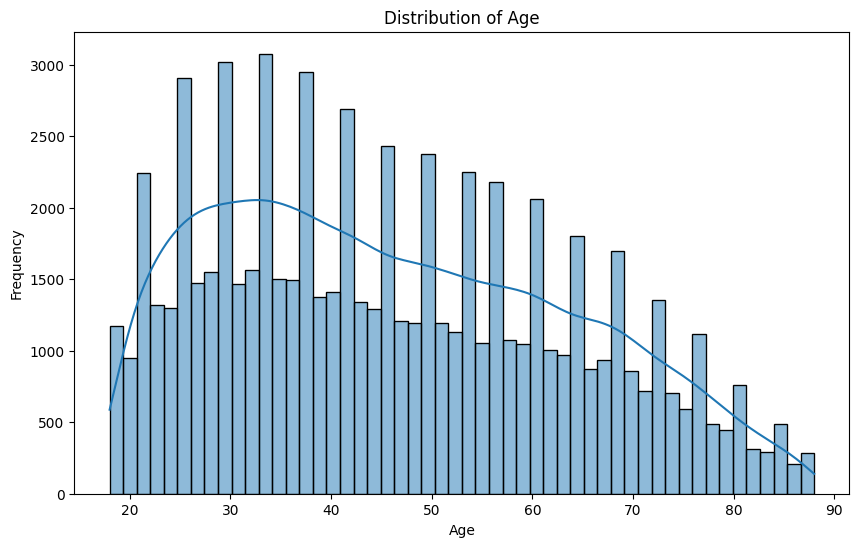

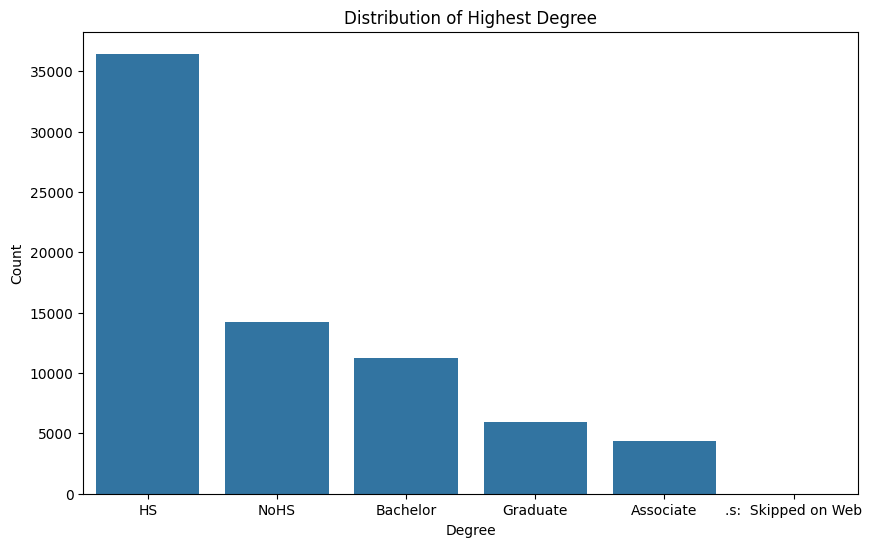

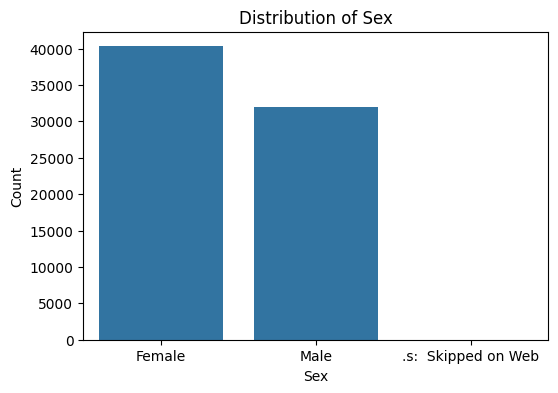

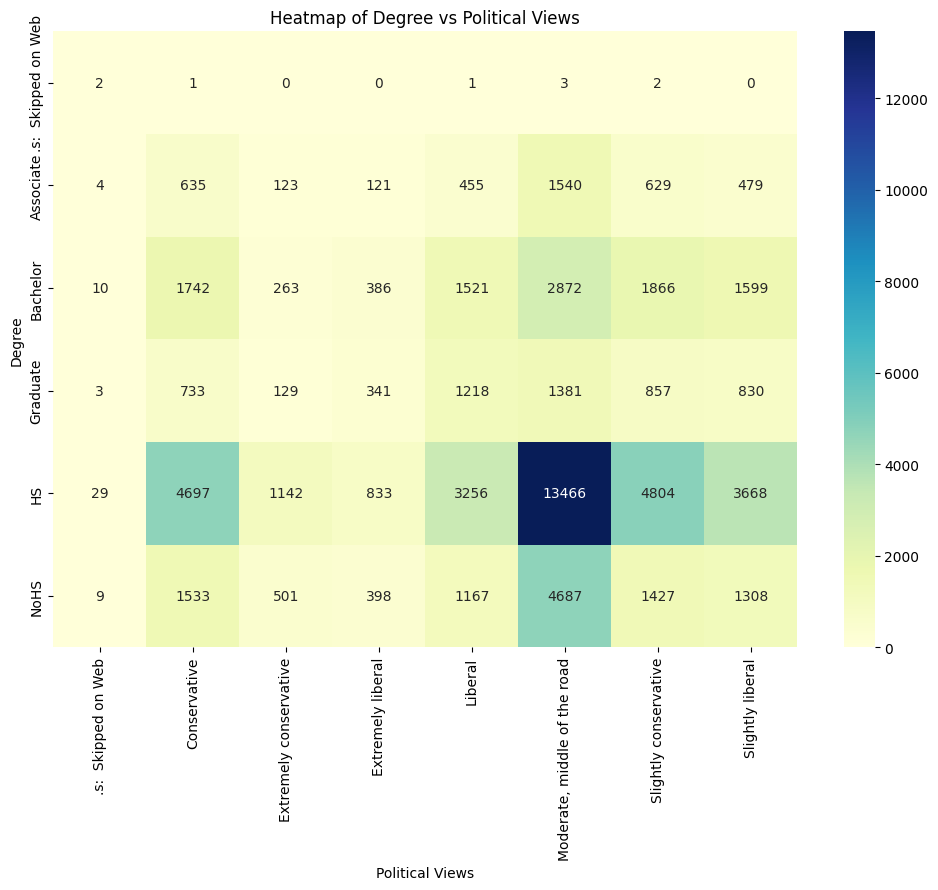

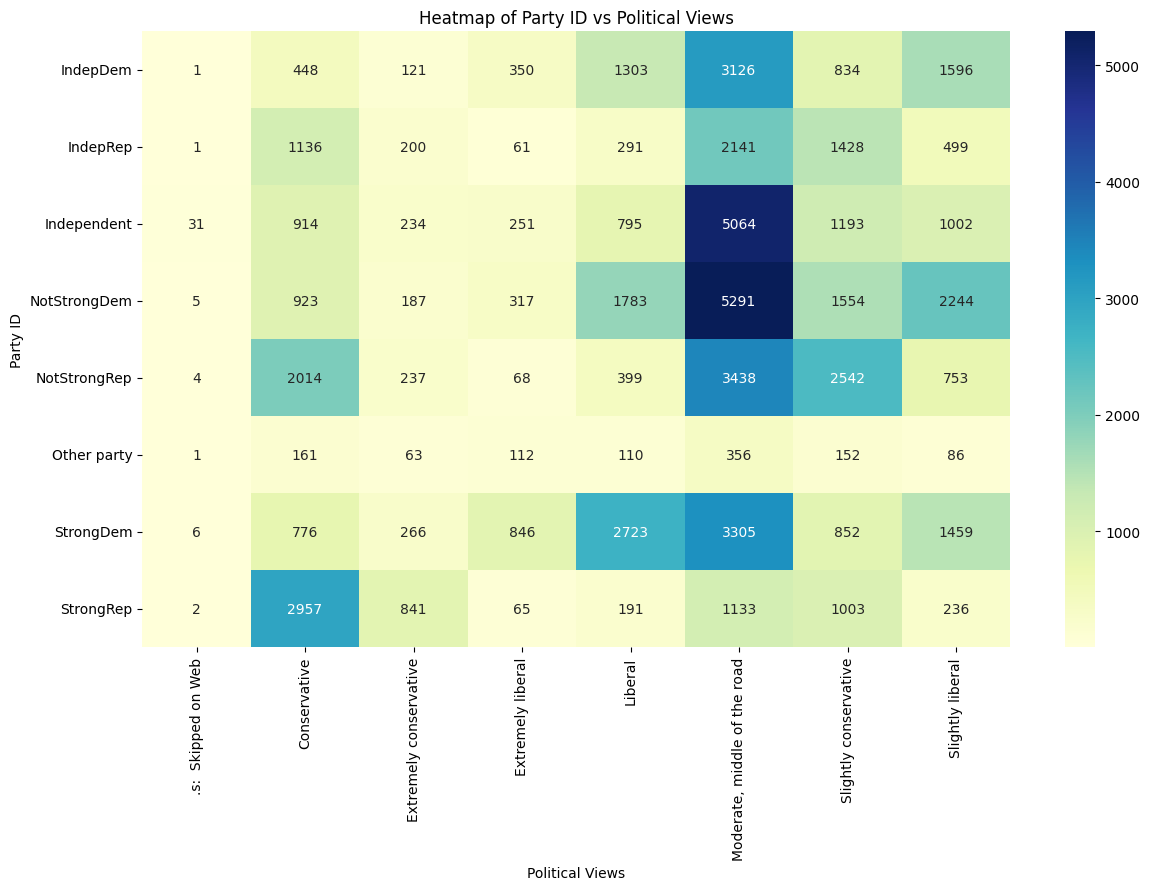

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_xlsx = pd.read_excel("GSS.xlsx")

# Replace strings
df_xlsx = df_xlsx.replace(['.i:  Inapplicable', '.n:  No answer', '.d:  Do not Know/Cannot Choose'], np.nan)

# Convert age to numeric
df_xlsx['age'] = pd.to_numeric(df_xlsx['age'], errors='coerce')

# Clean up
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Independent, close to democrat', 'IndepDem', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Independent, close to republican', 'IndepRep', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Independent (neither, no response)', 'Independent', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Not very strong democrat', 'NotStrongDem', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Not very strong republican', 'NotStrongRep', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Strong democrat', 'StrongDem', regex=False)
df_xlsx['partyid'] = df_xlsx['partyid'].str.replace('Strong republican', 'StrongRep', regex=False)

df_xlsx['degree'] = df_xlsx['degree'].str.replace('Less than high school', 'NoHS', regex=False)
df_xlsx['degree'] = df_xlsx['degree'].str.replace('High school', 'HS', regex=False)
df_xlsx['degree'] = df_xlsx['degree'].str.replace('Associate/junior college', 'Associate', regex=False)
df_xlsx['degree'] = df_xlsx['degree'].str.replace("Bachelor's", 'Bachelor', regex=False)
df_xlsx['degree'] = df_xlsx['degree'].str.replace('Graduate', 'Graduate', regex=False)

df_xlsx['sex'] = df_xlsx['sex'].str.replace('FEMALE', 'Female', regex=False)
df_xlsx['sex'] = df_xlsx['sex'].str.replace('MALE', 'Male', regex=False)

# counts for variables
print("\nValue Counts for Degree:\n", df_xlsx['degree'].value_counts(dropna=False))
print("\nValue Counts for Sex:\n", df_xlsx['sex'].value_counts(dropna=False))
print("\nValue Counts for Party ID:\n", df_xlsx['partyid'].value_counts(dropna=False))
print("\nValue Counts for Political Views:\n", df_xlsx['polviews'].value_counts(dropna=False))
print("\nValue Counts for Gun Law:\n", df_xlsx['gunlaw'].value_counts(dropna=False))
print("\nValue Counts for Abortion if Woman Wants:\n", df_xlsx['abany'].value_counts(dropna=False))
print("\nValue Counts for Race:\n", df_xlsx['racecen1'].value_counts(dropna=False))

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df_xlsx['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plots
plt.figure(figsize=(10, 6))
sns.countplot(data=df_xlsx, x='degree', order = df_xlsx['degree'].value_counts().index)
plt.title('Distribution of Highest Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_xlsx, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# A cross-tabulation of degree and political views
degree_polviews = pd.crosstab(df_xlsx['degree'], df_xlsx['polviews'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(degree_polviews, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Degree vs Political Views')
plt.ylabel('Degree')
plt.xlabel('Political Views')
plt.show()

# Party ID vs Political Views
partyid_polviews = pd.crosstab(df_xlsx['partyid'], df_xlsx['polviews'])

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(partyid_polviews, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Party ID vs Political Views')
plt.ylabel('Party ID')
plt.xlabel('Political Views')
plt.show()

